<a href="https://colab.research.google.com/github/alexfferro/Curso_ML/blob/master/Qualidade_de_vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [243]:
import numpy as np
import pandas as pd

In [244]:
from collections import Counter

In [245]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/winequality-red.csv')

# Sobre
Dataset analisando a qualidade de um vinho. sendo que de acordo com os detalhes do repositorio, caso o vinho possua qualidade de 6,5 ou superior, é um vinho "bom" caso contrario é um vinho "ruim". são classificados entre 0 e 10.
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009


In [246]:
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [247]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [248]:
dados.rename(columns={'fixed acidity': 'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
dados.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [249]:
import matplotlib.pyplot as plt

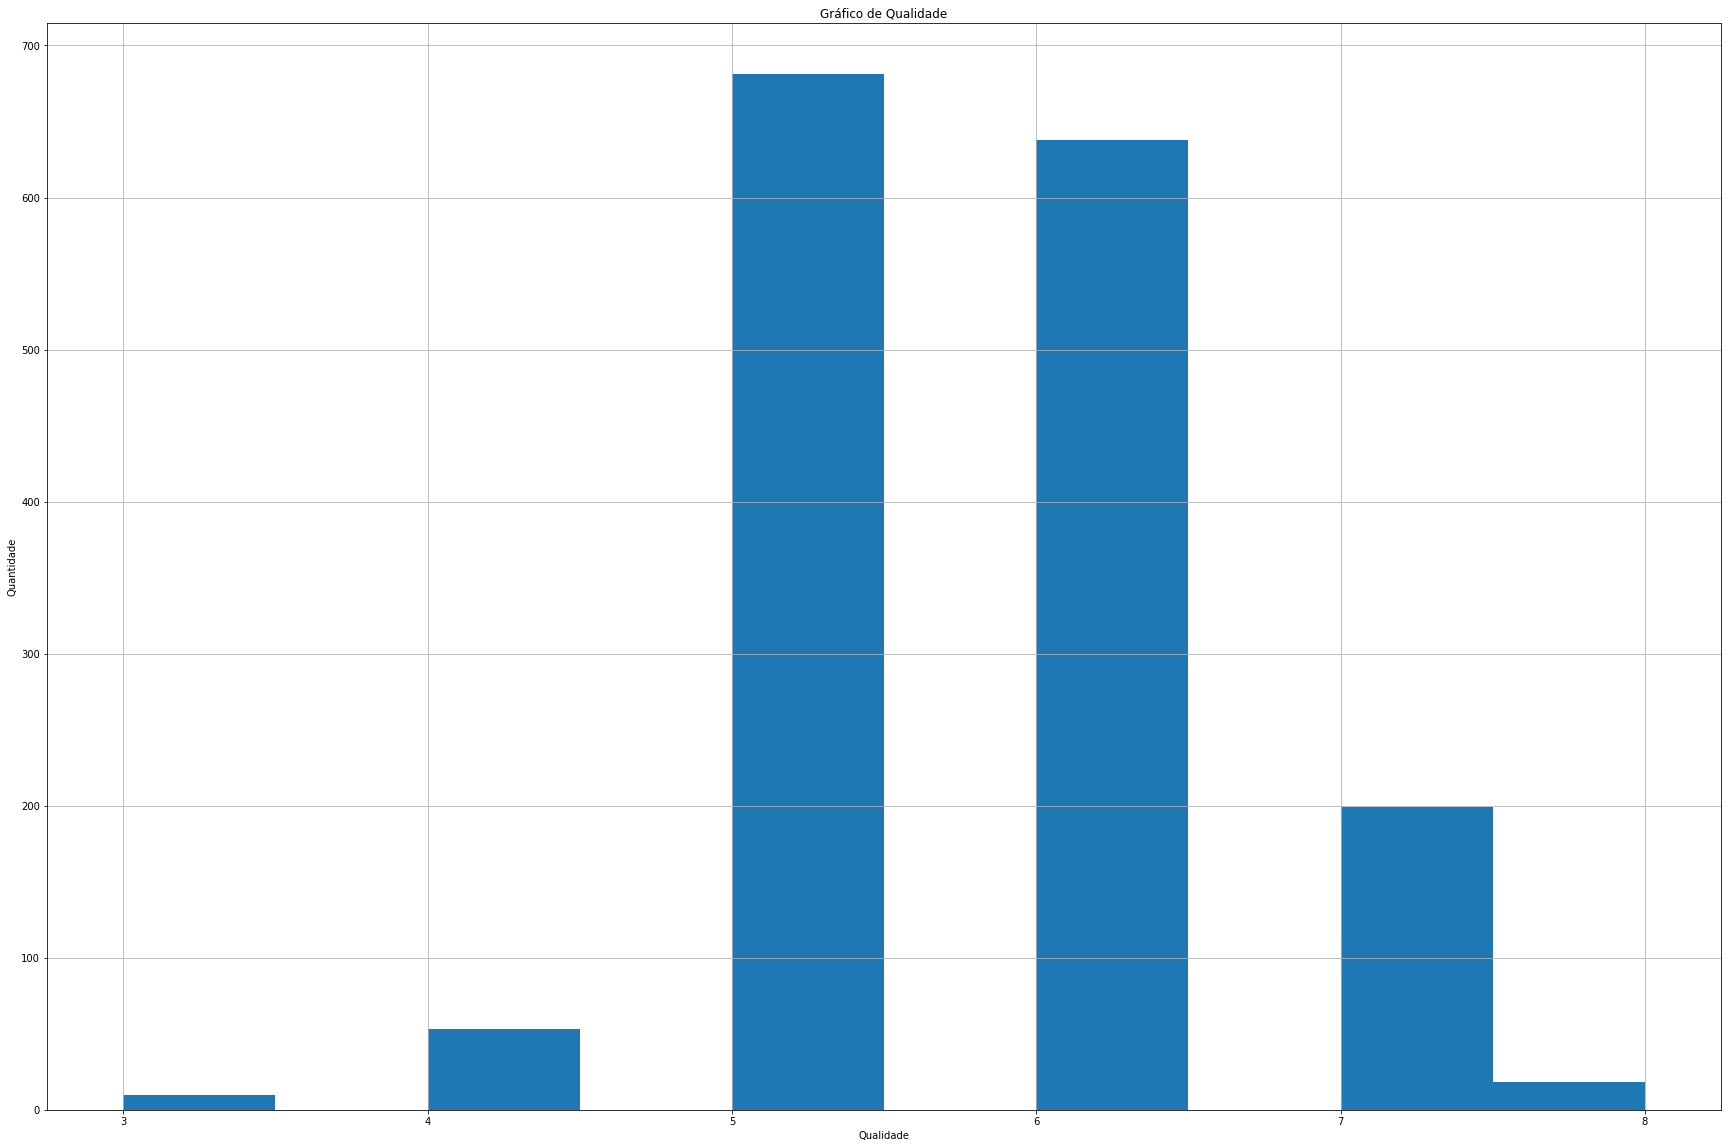

In [250]:
plt.hist(dados['quality'])
plt.xlabel('Qualidade')
plt.ylabel('Quantidade')
plt.title('Gráfico de Qualidade')
plt.grid(True)
plt.show()

#Qualidade

É perceptivel que a maior parte das instancias estão entre 5 e 6. Pouco mais que 200 instancias podem ser considerados realmente bons vinhos.

In [251]:
corr = dados.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


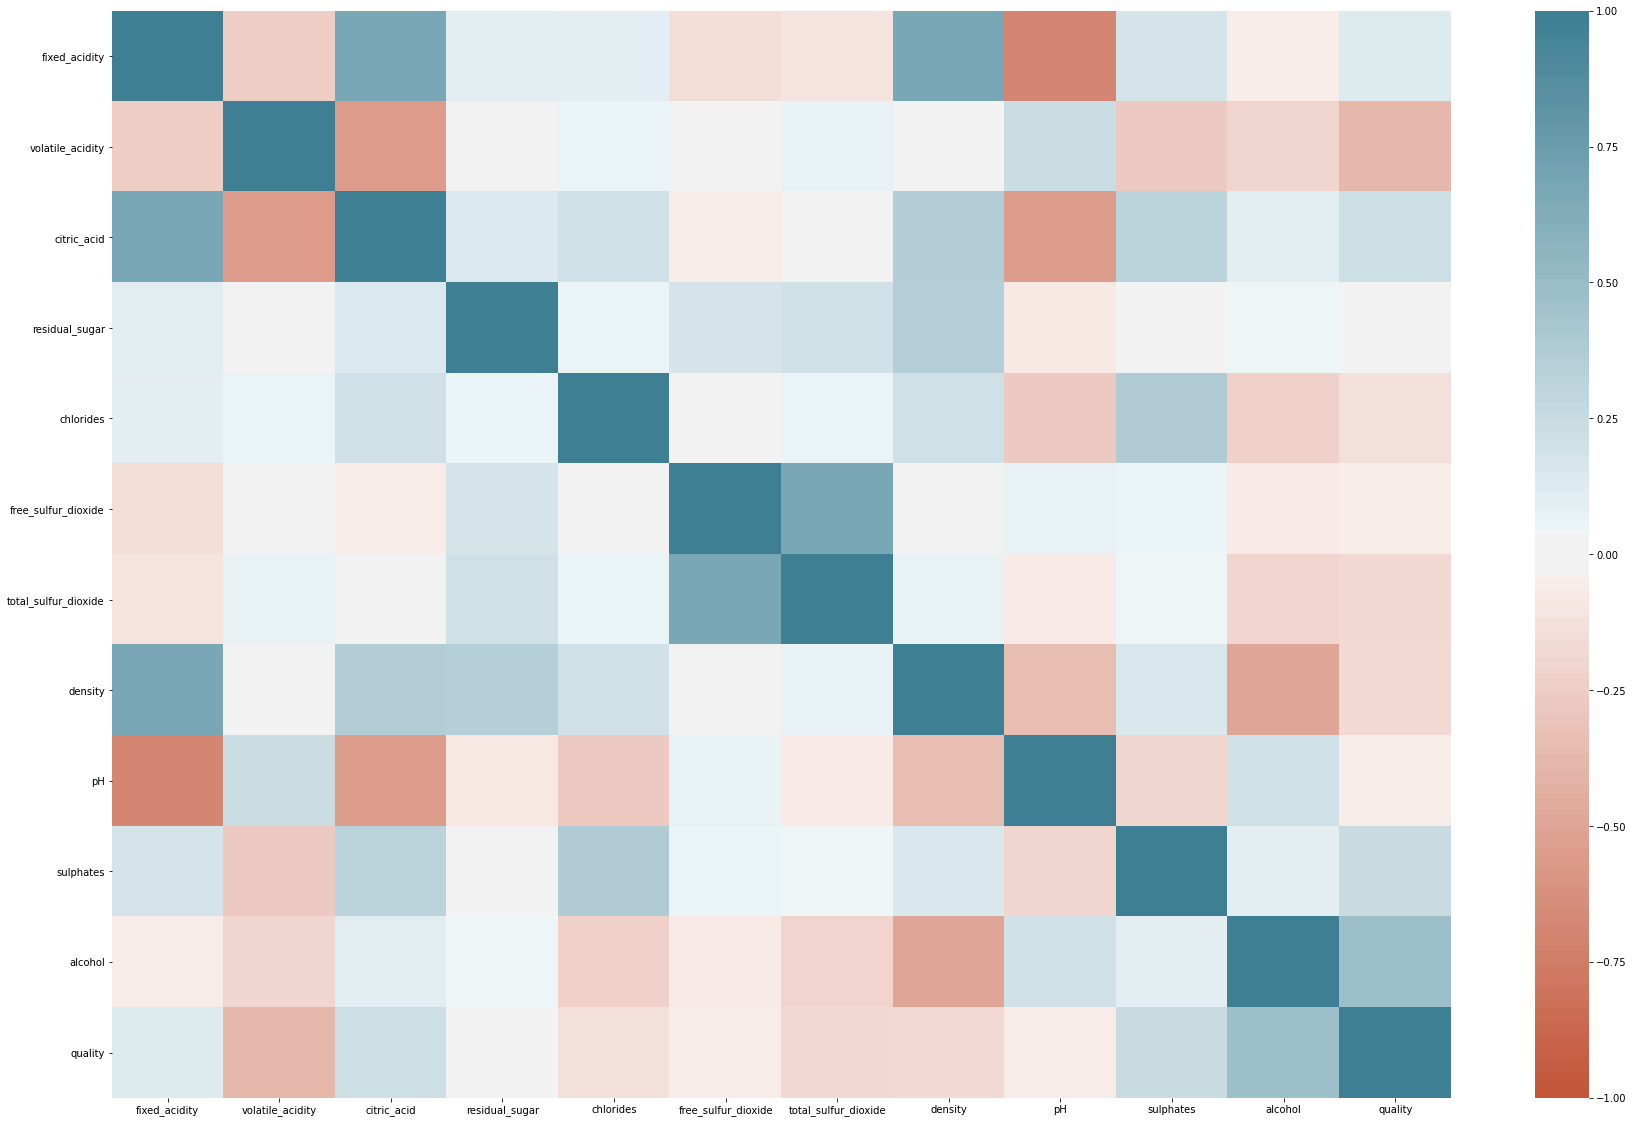

In [252]:
import seaborn as sns

sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

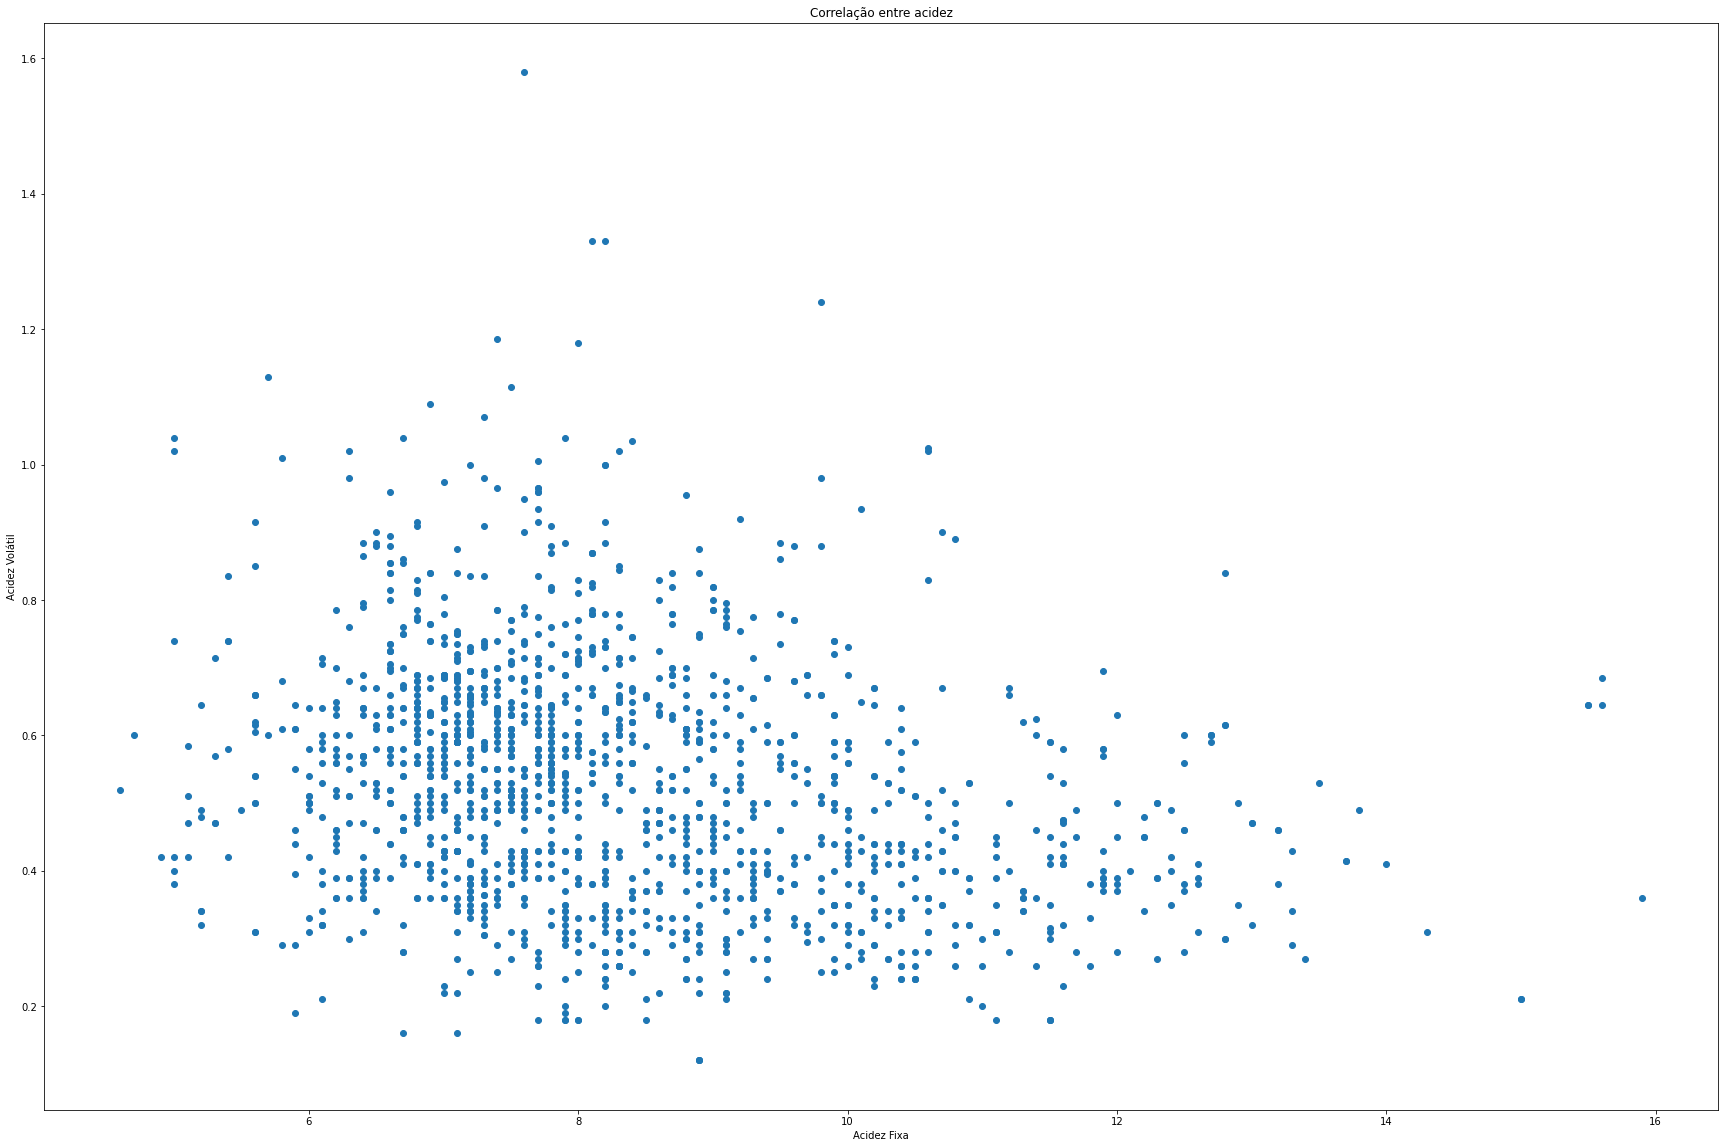

In [253]:
plt.scatter(dados.fixed_acidity,dados.volatile_acidity)
plt.xlabel('Acidez Fixa')
plt.ylabel('Acidez Volátil')
plt.title('Correlação entre acidez')
plt.show()

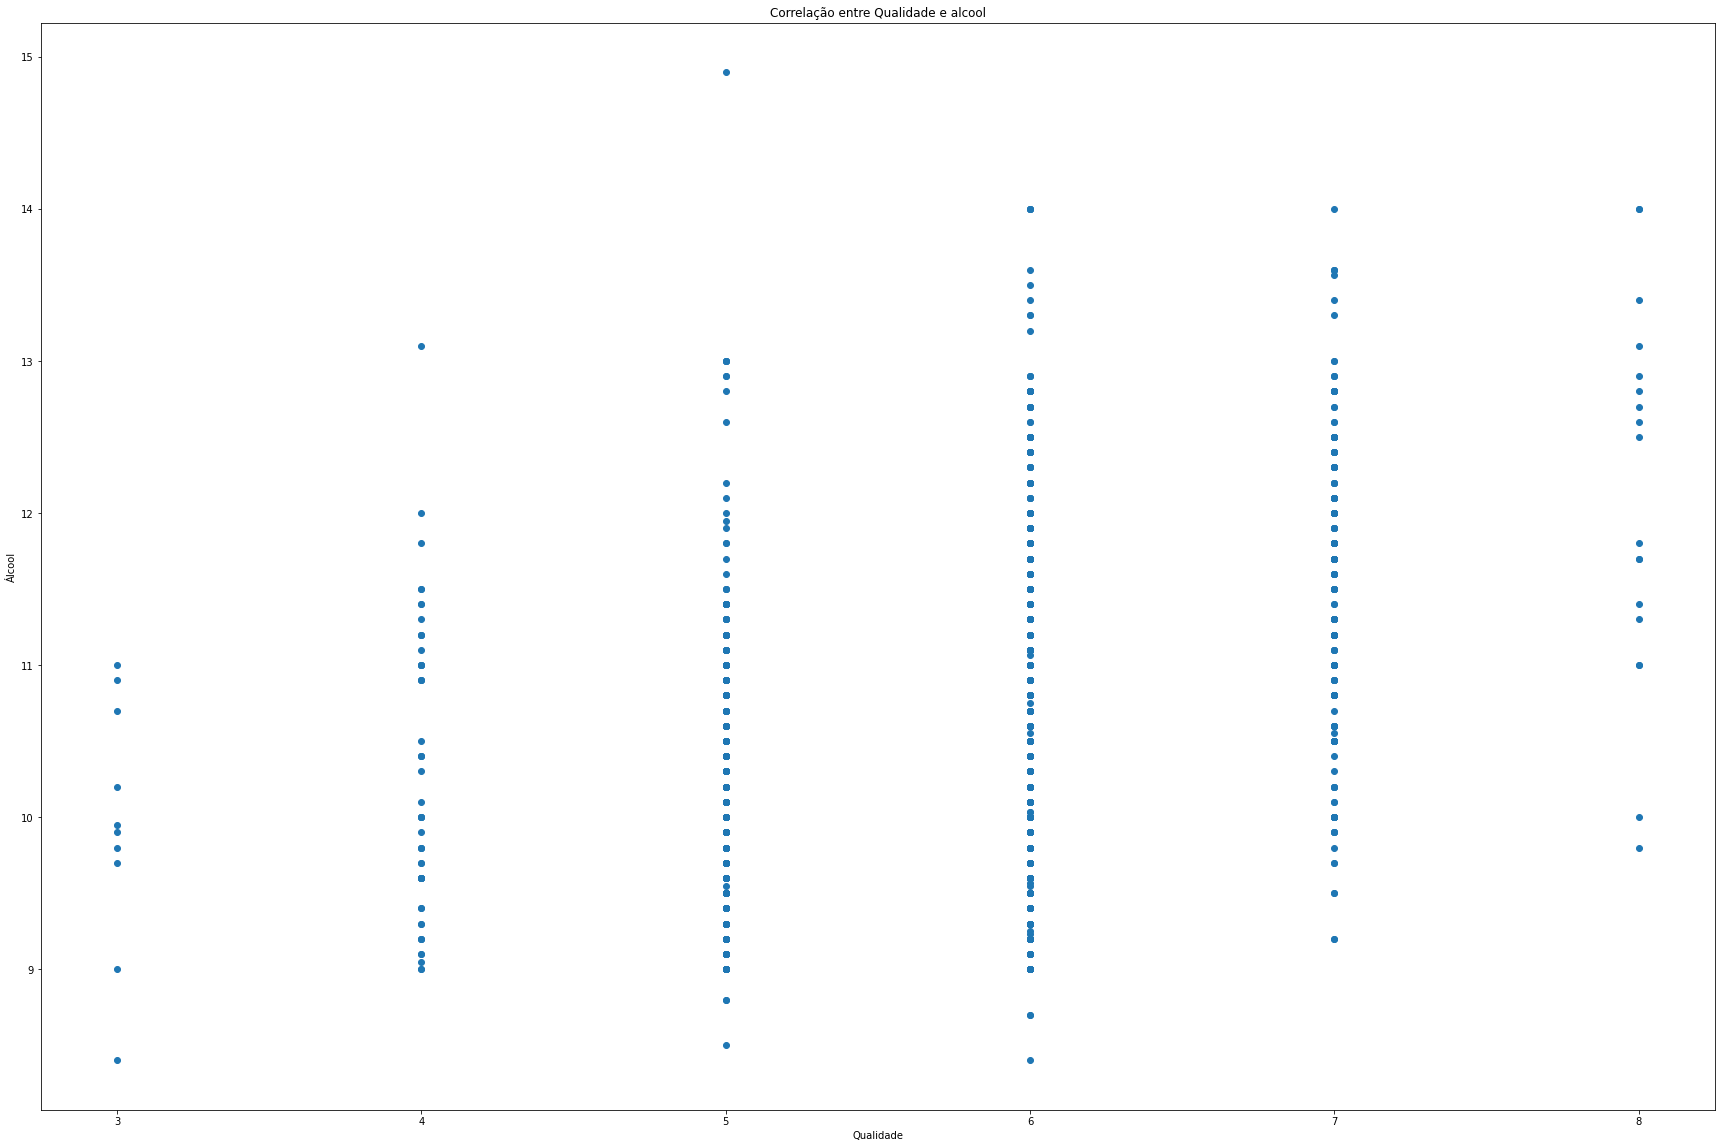

In [254]:
plt.scatter(dados.quality,dados.alcohol)
plt.xlabel('Qualidade')
plt.ylabel('Álcool')
plt.title('Correlação entre Qualidade e alcool')
plt.show()

#Correlação entre alguns paramêtros

Após a análise de algumas correlações, uma chamou atenção, em que o teor alcolico de um vinho de boa qualidade estão acima de 10.
Dito isto, um estudo mais aprofundado do mesmo poderia dar algumas informações mais interessantes.

#Segunda Atividade — Algoritmo de Arvore de Decisão
Efetuando a Re-Escala dos dados e logo em seguida separando os atributos de classe e os descritivos.
Nosso parametro descritivo será a qualidade, enquanto as classes serão os restantes atributos, e nosso algoritmo terá que dizer quais vinhos são de boa qualidade e os que não são.

In [255]:
x = dados.iloc[:,:11]

#Separando os dados
Iremos separar em alguns grupos a qualidade dos vinhos do data-set.

0 - Qualidade ruim [**Entre 1 e 3**]

1 - Qualidade aceitavel [**Entre 4 e 7**]

2 - Qualidade Excelente [**Entre 8 e 10**]


In [256]:
y = dados.quality
#dados['quality'] = dados['qua'].replace(['M','B'],[1,0])
for i in y:
  if i >= 1 and i <= 3:
    y = y.replace([i],[0])
  elif i >= 4 and i <= 7:
    y = y.replace([i],[1])
  elif i >= 8 and i <= 10:
    y = y.replace([i],[2])
print(y.value_counts())


1    1571
2      18
0      10
Name: quality, dtype: int64


In [257]:
from sklearn.model_selection import train_test_split

In [258]:
#dados = (dados - dados.min())/(dados.max()-dados.min())
#dados.head()

In [259]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [260]:
print("shape of train input data:",x_train.shape,"\n shape of train output data",y_train.shape,
      "\nshape of test input data ",x_test.shape,"\nshape of test output data",y_test.shape)

shape of train input data: (1279, 11) 
 shape of train output data (1279,) 
shape of test input data  (320, 11) 
shape of test output data (320,)


In [261]:
from sklearn.tree import DecisionTreeClassifier

In [262]:
model = DecisionTreeClassifier()

In [263]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [264]:
from sklearn.tree import plot_tree

In [265]:
plt.rcParams["figure.figsize"] = (30,20)

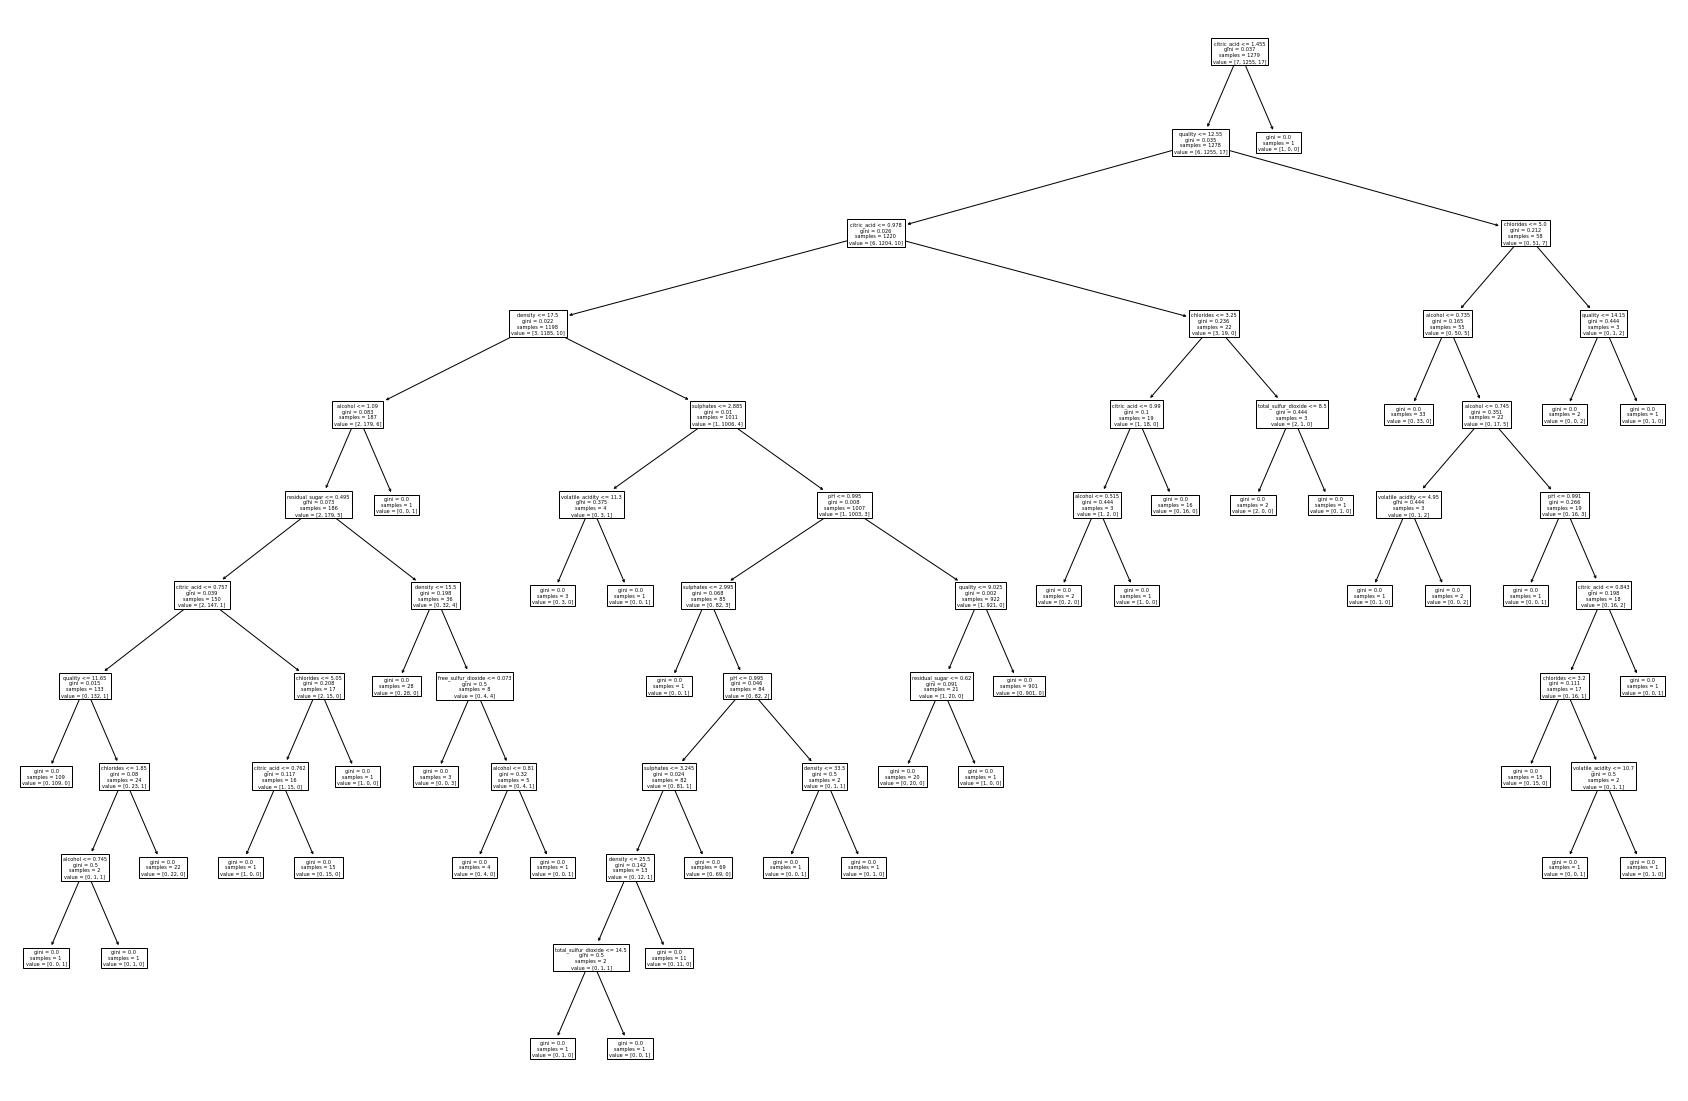

In [266]:
plot_tree(model,feature_names=dados.columns[1:])
plt.show()

In [267]:
classificacao = model.predict(x_test)
classificacao

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [268]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [269]:
acuracia = accuracy_score(y_test,classificacao)
acuracia

0.965625

In [270]:
precisao = precision_score(y_test, classificacao, average='weighted')
precisao

0.9748801916932907

In [271]:
recall = recall_score(y_test, classificacao, average='weighted')
recall

0.965625

In [272]:
f1 = f1_score(y_test, classificacao, average='weighted')
f1

0.9702305246422893

Random Forest

In [273]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [274]:
kf = KFold(n_splits=5)

In [275]:
for train,test in kf.split(x):
  print('Treino:',train,'\nTeste:',test)
  print('-----')

Treino: [ 320  321  322 ... 1596 1597 1598] 
Teste: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233

In [276]:
classificador = DecisionTreeClassifier()

In [277]:
scores = cross_val_score(classificador,x,y,cv=10)
scores

array([0.9625    , 0.975     , 0.925     , 0.94375   , 0.9       ,
       0.9625    , 0.9375    , 0.9625    , 0.95625   , 0.96855346])

In [278]:
floresta = RandomForestClassifier(n_estimators=50)
floresta.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [279]:
floresta.score(x_test,y_test)

0.9875

#Alterando o Shape da classe
Nos testes anteriores estavamos utilizando 3 tipos de classes.
iremos alterar agora para apenas bons vinhos que variam entre 6 - 10
e vinhos ruins que variam entre 1-5.
Desta forma o dados ficam mais homogeneos e veremos os resultados do algoritmo de arvore de decisão e Random forest.


In [293]:
Y = dados.quality
#dados['quality'] = dados['qua'].replace(['M','B'],[1,0])
for i in Y:
  if i >= 1 and i <= 5:
    Y = Y.replace([i],[0])
  elif i >= 6 and i <= 10:
    Y = Y.replace([i],[1])
print(Y.value_counts())

1    855
0    744
Name: quality, dtype: int64


In [281]:
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size=0.2)#random_state=42

In [282]:
arvore = DecisionTreeClassifier()

In [283]:
arvore.fit(x_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [284]:
Class = arvore.predict(x_test)
Class

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [285]:
Acuracia = accuracy_score(Y_test,Class)
Acuracia

0.85625

In [286]:
Precisao = precision_score(Y_test,Class)
Precisao

0.5208333333333334

In [287]:
Recall = recall_score(Y_test,Class)
Recall

0.5208333333333334

In [288]:
F1 = f1_score(Y_test, Class)
F1

0.5208333333333334

In [289]:
fpr, tpr, _ = roc_curve(Y_test,Class)

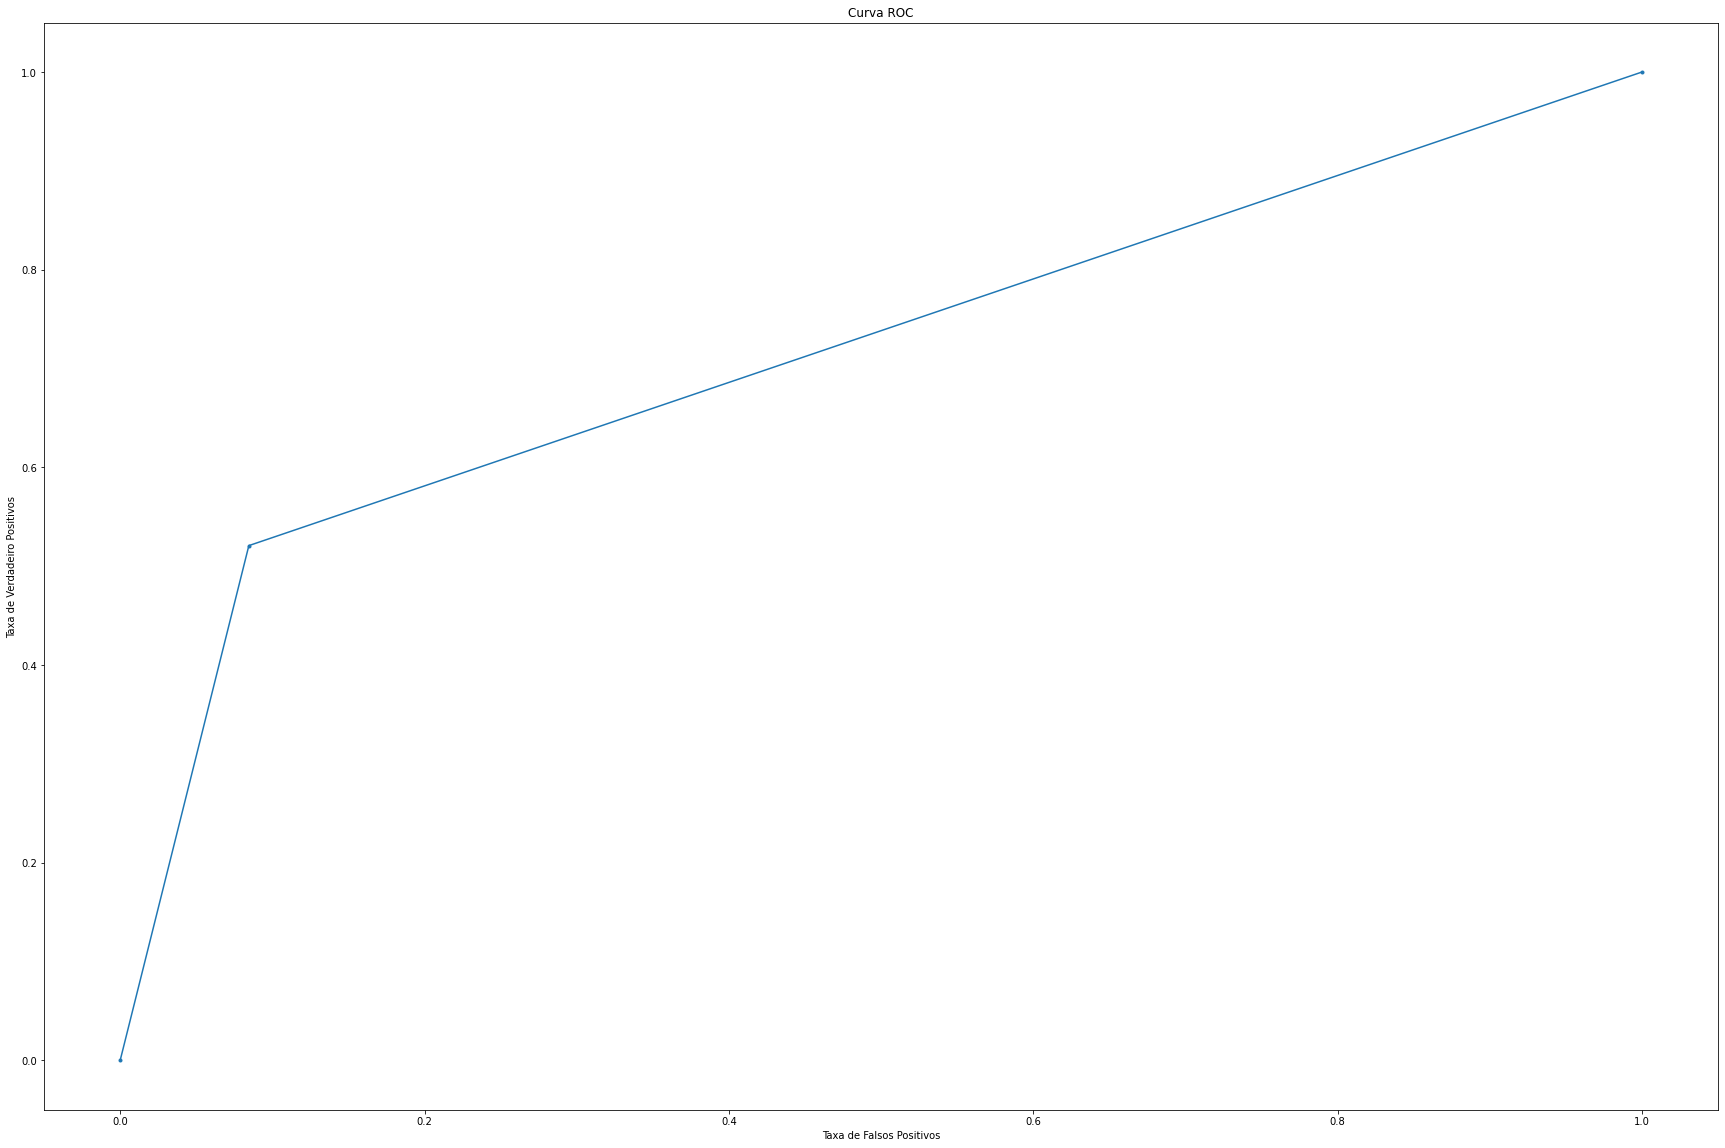

In [290]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

In [291]:
Floresta = RandomForestClassifier(n_estimators=100)
Floresta.fit(x_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [292]:
floresta.score(x_test,Y_test)

0.15

#Análise do Dataset

De acordo com os resultados das métricas o resultado obtido pelo algoritmo de aprendizado foi razoavelmente bom, na random forest obtivemos uma acuracia de 97% e na arvore de decisão uma variação entre 94 e 96% de acerto, porém, assumindo que as informações que foram recolhidas do conjunto de dados possuiam um grupo maior que os demais.

* 1 — 1571 - Vinhos de qualidade entre 4 e 7.
* 2 — 18 - Vinhos de qualidade acima de 8.
* 0 — 10 - vinhos de qualidade abaixo de 4.

Os vinhos de excelente qualidade são apenas 18, quando a maior parte do data-set entra nos vinhos de qualidade aceitavel. 
Ao implementar um shape diferente onde:

* 0 - São vinhos de qualidade acima de 6.
* 1 - São vinhos de qualidade abaixo de 6.

Apesar de os dados estarem distribuidos de forma mais equalitaria, os resultados não foram bons. a acuracia do algoritmo ficou entre 54% usando random forest, e cerca de 75% usando arvore de decisão.

O primeiro shape utilizado se mostrou mais eficiente quanto aos resultados de precisão em todos os aspectos tanto na arvore de decisão, quanto na random forest.